In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
import numpy as np
from scipy .cluster.hierarchy import linkage

sys.version


'2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

In [5]:
spark.sql('SHOW DATABASES').show()

+------------+
|databaseName|
+------------+
|     default|
| opengovdata|
|          sm|
|        test|
+------------+



In [6]:
spark.sql('SHOW DATABASES')

DataFrame[databaseName: string]

In [7]:
#  Load data set from hive
cs = spark.sql("SELECT * FROM opengovdata.civil_society_selected")
#  Load data to pandas DataFrame
cs = cs.toPandas()

#  Load data set from hive
wb = spark.sql("SELECT * FROM opengovdata.world_bank_selected")
#  Load data to pandas DataFrame
wb = wb.toPandas()

#  Reduce data to desired country
#  df_poland = civil_society_selected[civil_society_selected.COUNTRY == "Poland"]

In [9]:
cs.head(2)

,YEAR,COUNTRY,WAVE_WVS,WAVE_DESC_WVS,RESPONDED_CHURCH_N_WVS,RESPONDED_SPORT_N_WVS,RESPONDED_ARTMUSICEDU_N_WVS,RESPONDED_LABORUNION_N_WVS,RESPONDED_POLITICAL_N_WVS,RESPONDED_ENVIRONMENTAL_N_WVS,...,V2PEEDUEQ_VDEM,V2PEEDUEQ_NR_VDEM,V2PEHEALTH_VDEM,V2PEHEALTH_NR_VDEM,V2PEPRISCH_VDEM,V2PESECSCH_VDEM,V2PETERSCH_VDEM,REGION,SUB_REGION,INTERMEDIATE_REGION
0,1990.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.103151,6.0,-1.514656,6.0,27.76105,14.003685,3.266262,Asia,Southern Asia,
1,1991.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.103151,6.0,-1.514656,6.0,27.82737,14.355790,NaN,Asia,Southern Asia,


In [10]:
wb.head(2)

,COUNTRY,YEAR,NY_ADJ_AEDU_GN_ZS,NY_ADJ_ICTR_GN_ZS,NY_ADJ_NNTY_KD_ZG,NY_GDP_TOTL_RT_ZS,AG_LND_ARBL_ZS,IC_BUS_EASE_XQ,IC_EC_QJPI,IC_LGL_DURS,...,BN_CAB_XOKA_GD_ZS,CC_EST,GE_EST,PV_EST,RL_EST,RQ_EST,VA_EST,REGION,SUB_REGION,INTERMEDIATE_REGION
0,Afghanistan,1990.0,1.6,NaN,NaN,1.065727,12.11592,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
1,Afghanistan,1991.0,1.6,NaN,NaN,1.065727,12.11592,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,


In [52]:
merged = pd.merge(cs, wb, on=['COUNTRY', 'YEAR','REGION', 'SUB_REGION', 'INTERMEDIATE_REGION'], how="outer")

In [49]:
merged.dropna(how ="all").shape
print(merged["SUB_REGION"])

0         Southern Asia
1         Southern Asia
2         Southern Asia
3         Southern Asia
4         Southern Asia
5         Southern Asia
6         Southern Asia
7         Southern Asia
8         Southern Asia
9         Southern Asia
10        Southern Asia
11        Southern Asia
12        Southern Asia
13        Southern Asia
14        Southern Asia
15        Southern Asia
16        Southern Asia
17        Southern Asia
18        Southern Asia
19        Southern Asia
20        Southern Asia
21        Southern Asia
22        Southern Asia
23        Southern Asia
24        Southern Asia
25        Southern Asia
26        Southern Asia
27        Southern Asia
28      Southern Europe
29      Southern Europe
             ...       
7082          Polynesia
7083          Polynesia
7084    Northern Africa
7085    Northern Africa
7086    Northern Africa
7087    Northern Africa
7088    Northern Africa
7089    Northern Africa
7090    Northern Africa
7091    Northern Africa
7092    Northern

In [48]:
#  Filter data by country and list available columns
merged[merged.COUNTRY == "Poland"].columns.tolist()

['YEAR',
 'COUNTRY',
 'WAVE_WVS',
 'WAVE_DESC_WVS',
 'RESPONDED_CHURCH_N_WVS',
 'RESPONDED_SPORT_N_WVS',
 'RESPONDED_ARTMUSICEDU_N_WVS',
 'RESPONDED_LABORUNION_N_WVS',
 'RESPONDED_POLITICAL_N_WVS',
 'RESPONDED_ENVIRONMENTAL_N_WVS',
 'RESPONDED_PROFESSIONAL_N_WVS',
 'RESPONDED_CHARITY_N_WVS',
 'RESPONDED_OTHER_N_WVS',
 'RESPONDED_CONSUMER_N_WVS',
 'RESPONDED_HELP_GROUP_N_WVS',
 'RESPONDED_ANY_N_WVS',
 'ACTIVE_CHURCH_PCT_WVS',
 'MEMBERS_CHURCH_PCT_WVS',
 'ACTIVE_SPORT_PCT_WVS',
 'MEMBERS_SPORT_PCT_WVS',
 'ACTIVE_ARTMUSICEDU_PCT_WVS',
 'MEMBERS_ARTMUSICEDU_PCT_WVS',
 'ACTIVE_LABORUNION_PCT_WVS',
 'MEMBERS_LABORUNION_PCT_WVS',
 'ACTIVE_POLITICAL_PCT_WVS',
 'MEMBERS_POLITICAL_PCT_WVS',
 'ACTIVE_ENVIRONMENTAL_PCT_WVS',
 'MEMBERS_ENVIRONMENTAL_PCT_WVS',
 'ACTIVE_PROFESSIONAL_PCT_WVS',
 'MEMBERS_PROFESSIONAL_PCT_WVS',
 'ACTIVE_CHARITY_PCT_WVS',
 'MEMBERS_CHARITY_PCT_WVS',
 'ACTIVE_OTHER_PCT_WVS',
 'MEMBERS_OTHER_PCT_WVS',
 'ACTIVE_ANY_PCT_WVS',
 'MEMBERS_ANY_PCT_WVS',
 'CPI_SCORE_CPI',
 'YEAR_

In [50]:
merged.loc[:, ["YEAR", "V2XCS_CCSI_VDEM"]]

,YEAR,V2XCS_CCSI_VDEM
0,1990.0,0.064383
1,1991.0,0.064383
2,1992.0,0.162394
3,1993.0,0.169520
4,1994.0,0.169520
5,1995.0,0.143058
6,1996.0,0.037357
7,1997.0,0.037357
8,1998.0,0.037357
9,1999.0,0.037357


In [18]:
len(merged['COUNTRY'].drop_duplicates().tolist())

250

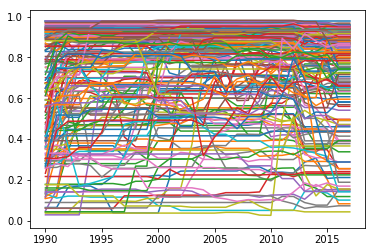

In [19]:
#  Plot all countries' Core civil society index
for country in merged['COUNTRY'].drop_duplicates().tolist():

    plt.plot(merged[merged["COUNTRY"] == country]["YEAR".upper()], 
             merged[merged["COUNTRY"] == country]["v2xcs_ccsi_VDEM".upper()])

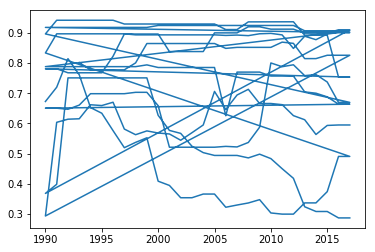

In [25]:
plt.plot(cs[cs["SUB_REGION"] == "Eastern Europe"]["YEAR".upper()], 
             cs[cs["SUB_REGION"] == "Eastern Europe"]["v2xcs_ccsi_VDEM".upper()])

In [27]:
wb["SUB_REGION"]

0            Southern Asia
1            Southern Asia
2            Southern Asia
3            Southern Asia
4            Southern Asia
5            Southern Asia
6            Southern Asia
7            Southern Asia
8            Southern Asia
9            Southern Asia
10           Southern Asia
11           Southern Asia
12           Southern Asia
13           Southern Asia
14           Southern Asia
15           Southern Asia
16           Southern Asia
17           Southern Asia
18           Southern Asia
19           Southern Asia
20           Southern Asia
21           Southern Asia
22           Southern Asia
23           Southern Asia
24           Southern Asia
25           Southern Asia
26           Southern Asia
27           Southern Asia
28         Southern Europe
29         Southern Europe
               ...        
6858    Sub-Saharan Africa
6859    Sub-Saharan Africa
6860    Sub-Saharan Africa
6861    Sub-Saharan Africa
6862    Sub-Saharan Africa
6863    Sub-Saharan Africa
6

In [23]:
df_vdem = cs[[x for x in cs.columns if "VDEM" in x]][cs["COUNTRY"]=="Poland"]

In [25]:
corr_matrix = df_vdem.corr(method='pearson')

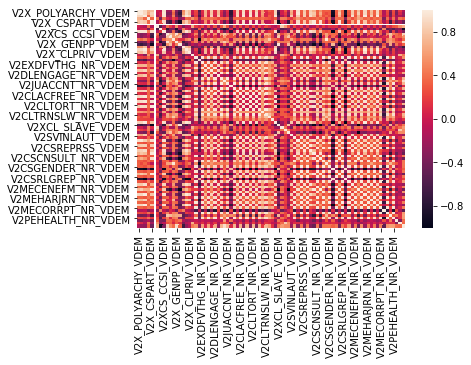

In [28]:
sns.heatmap(corr_matrix)

In [2]:
corr_matrix["v2xcs_ccsi_VDEM".upper()].sort_values(ascending =False)

NameError: name 'corr_matrix' is not defined

In [ ]:
#  Plot all countries' Core civil society index
country = "Poland"
cs[cs["COUNTRY"] == country]["v2xcs_ccsi_VDEM".upper()]

for country in cs['COUNTRY'].drop_duplicates().tolist():

             cs[cs["COUNTRY"] == country]["v2xcs_ccsi_VDEM".upper()]

In [37]:
cs["SUB_REGION"].drop_duplicates()

0                         Southern Asia
28                      Southern Europe
56                      Northern Africa
112                  Sub-Saharan Africa
140     Latin America and the Caribbean
224                        Western Asia
280           Australia and New Zealand
308                      Western Europe
476                      Eastern Europe
588                    Northern America
756                  South-eastern Asia
1120                       Eastern Asia
1232                          Polynesia
1428                    Northern Europe
1764                          Melanesia
2688                       Central Asia
2744                         Micronesia
4004                               None
Name: SUB_REGION, dtype: object

In [66]:
s_country = "Ukraine"

df_country = merged[merged.COUNTRY == s_country]
mask = df_country.apply(pd.Series.nunique) > 20
h_vars = df_country.loc[:, mask]
h_vars = h_vars.dropna(axis=1, how='all')

In [67]:
corr_matrix = h_vars.corr()
corr_matrix.shape

(85, 85)

In [68]:
z = linkage(corr_matrix)

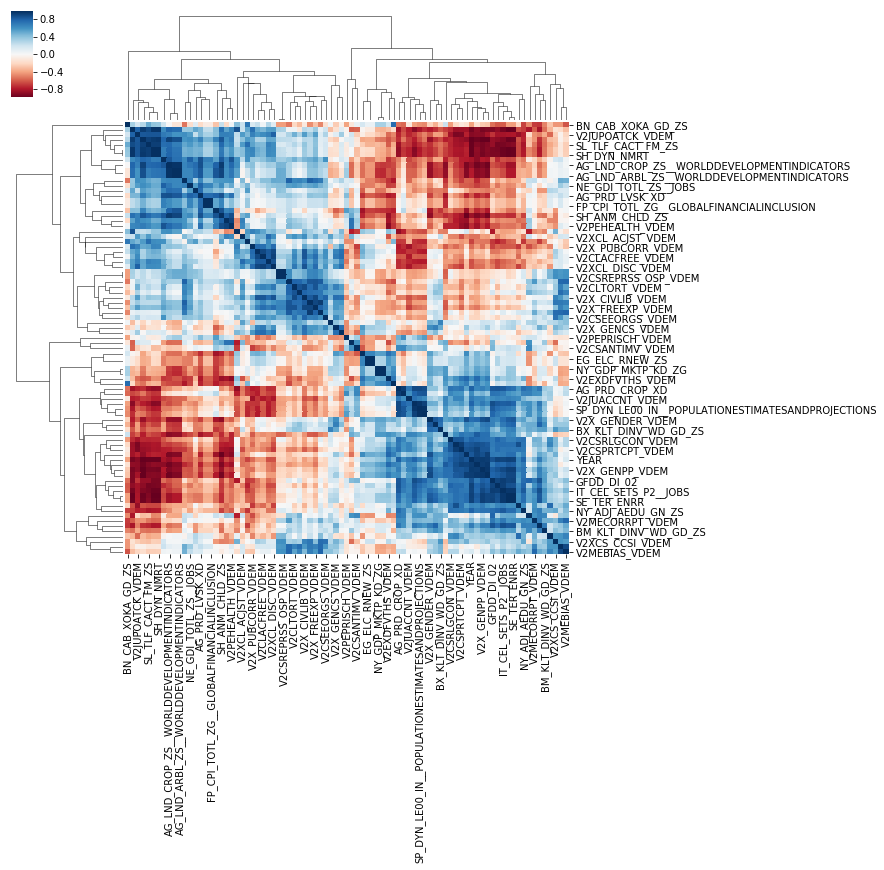

In [69]:
sns.clustermap(corr_matrix, cmap="RdBu")

In [70]:
merged.shape

(7112, 393)

In [71]:
def elbow_method(corr_matrix, linkage_method):
    """
    Determine and print number of clusters with Ellbow Method:
    (https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)
    Another thing you might see out there is a variant of the "elbow method".
    It tries to find the clustering step where the acceleration of distance growth is the biggest
    (the "strongest elbow" of the blue line graph below, which is the highest value of the green graph below):

    :parameter corr_matrix: Matrix of correlations given by the DataFrame.corr(method='pearson') function
    :type corr_matrix: pandas.core.frame.DataFrame
    :parameter linkage_method: methods for calculating the distance between the newly formed cluster u and each v. e.g. 'single', 'complete', 'average', 'weighted', 'centroid', 'ward'
    :type linkage_method: str
    """

    Z = linkage(corr_matrix, linkage_method)  # You can also use other methods like 'average'

    # Plot preperation. Only select the largest distance steps that are important for clustering and choosing a good number of clusters
    last = Z[-20:, 2]
    last_rev = last[::-1]
    idxs = np.arange(1, len(last) + 1)

    # Plot the clustering performance index (averaged distances) dependent on the number of clusters
    plt.figure()
    plt.plot(idxs, last_rev, label='Quality measure of clusters', marker="o", color='k')

    # 1st derivative of the distances
    first_derivative = np.diff(last, 1)
    first_derivative_rev = first_derivative[::-1]
    plt.plot(idxs[:-1] + 0.5, first_derivative_rev, label='1st derivative', marker="o", markersize=10, linestyle='',
             color='r')
    plt.plot(idxs[:-1] + 0.5, np.abs(first_derivative_rev), label='1st derivative abs', marker="o", markersize=10,
             linestyle='', color='g')

    # 2nd derivative of the distances
    acceleration = np.diff(last, 2)
    acceleration_rev = acceleration[::-1]
    plt.plot(idxs[:-2] + 1, np.abs(acceleration_rev), label='2nd derivative (abs)',
             marker="o", markersize=7, linestyle='', color='b')  # maybe better with abs values
    # plt.plot(idxs[:-2] + 1, acceleration_rev, label='2nd derivative', marker="o")

    # Calculate point with maximum acceleration. Maybe not the best indicator for this purpose.
    k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
    print("clusters:", k)

    # Some plot settings to make it look awesome
    plt.xticks(np.arange(0, plt.gca().get_xlim()[1] + 1, 1.0))
    plt.xlabel('Number of clusters')
    plt.ylabel('Quality index of cluster')
    plt.title('Elbow method: ' + str(k) + ' clusters recommended')
    plt.legend()
    plt.gcf().subplots_adjust(bottom=0.15)

    return k


('clusters:', 2)


2

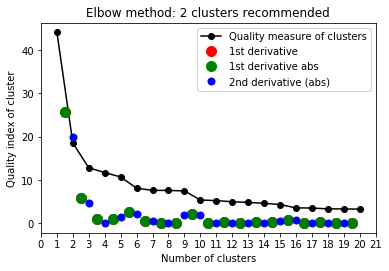

In [74]:
elbow_method(corr_matrix, "ward")

In [75]:
merged.shape

(7112, 393)

In [76]:
cs.shape

(6104, 219)

In [77]:
wb.shape

(6888, 179)

In [79]:
cs.shape[1]+wb.shape[1]-5

393

In [87]:
# Get available corr values per country
for eastern_country, data in merged[merged["SUB_REGION"]=="Eastern Europe"].groupby('COUNTRY'):
    print(eastern_country)
    mask = data.apply(pd.Series.nunique) > 20
    data = data.loc[:, mask]
    data = data.dropna(axis=1, how='all')
    corr_matrix = data.corr()
    print("Available correlation values: ", corr_matrix.shape[0])
    print("Number of recommended groups: ", corr_matrix.shape[0])

Belarus
49
Bulgaria
51
Czech Republic
46
Czechoslovakia
1
Hungary
47
Moldova
52
Poland
49
Romania
49
Russian Federation
61
Slovakia
46
Ukraine
85
